# Basic introduction to NumPy

> **Skills to take away**
>
> - **Basic**: n-dimensional arrays (dimension, shape, size), organization of data along axes, element-wise operations
> - **Medium**: n-dimensional slicing, fancy indexing, basic broadcasting (no new axis), linspace/arange
> - **Expert**: general broadcasting, n-dimensional random arrays (`np.random`)

## Motivations

**Why NumPy?** NumPy stands for *Numerical Python* and is highly optimized (and therefore fast) for computations in Python. NumPy is one of the core packages on which many others are based, such as SciPy (for *Scientific Python*), Matplotlib, or Pandas. Many other scientific tools are also based on NumPy, which justifies having at least a basic understanding of how it works. However, one might also ask, *why Python* in the first place?

**Why Python?** Depending on your preferences and purposes, Python can be a very good option (or not - this language has pros and cons, like any other). In any case, many tools are available in Python that cover a broad spectrum of applications, from machine learning to web design or string processing. Learning Python is definitely a good investment for general-purpose applications.

## The core objects: arrays

The core of NumPy is the numpy array. These objects allow for efficient computations over large datasets in a concise way from a language point of view, and very fast from a processing time point of view. The price to pay is giving up explicit *for* loops. This leads to a somewhat counterintuitive logic - at first.

### Main differences to usual Python lists

The first point is to differentiate a NumPy array from a Python list, as they don't behave in the same way. Let's define two python lists and their equivalent NumPy arrays.

In [1]:
import numpy as np
l1, l2 = [1, 2, 3], [3, 4, 5]
a1, a2 = np.array([1, 2, 3]), np.array([3, 4, 5])
print(l1, l2)

[1, 2, 3] [3, 4, 5]


First of all, all mathematical operations act element-wise in a NumPy array. For a Python list, addition acts as concatenation of the lists, and multiplication by a scalar acts as replication of the lists.

In [2]:
# obj1+obj2
print('python lists: {}'.format(l1+l2))
print('numpy arrays: {}'.format(a1+a2))

python lists: [1, 2, 3, 3, 4, 5]
numpy arrays: [4 6 8]


In [3]:
# obj*3
print('python list: {}'.format(l1*3))
print('numpy array: {}'.format(a1*3))

python list: [1, 2, 3, 1, 2, 3, 1, 2, 3]
numpy array: [3 6 9]


One other important difference is the way to access elements of an array, known as slicing and indexing. Here, the behavior of Python lists and NumPy arrays is similar, except that NumPy arrays support a few additional features, such as indexing by an array of integers (which does not work for Python lists). Use cases for such indexing will be extensively illustrated in the next chapters.

In [4]:
# Indexing with an integer: obj[1]
print('python list: {}'.format(l1[1]))
print('numpy array: {}'.format(a1[1]))

python list: 2
numpy array: 2


In [5]:
# Indexing with a slicing: obj[slice(1,3))]
print('python list: {}'.format(l1[slice(1,3)]))
print('numpy array: {}'.format(l1[slice(1,3)]))

python list: [2, 3]
numpy array: [2, 3]


In [6]:
# Indexing with a list of integers: obj[[0,2]]
print('python list: IMPOSSIBLE')
print('numpy array: {}'.format(a1[[0,2]]))

python list: IMPOSSIBLE
numpy array: [1 3]


### Memory management in Python and NumPy

When a list is created in Python (and NumPy), you might want to copy it and modify the copy to have both the unmodified original version and the modified copied version. However, this doesn't work as expected: the original list will be modified too. If you are not sure what is happening, you can try it out. Here is an example:

In [7]:
# Create a list
l1 = [1, 2, 3]

# Getting a copy and modifying it
l2 = l1
l2[1] = 10

# Print the two lists : both are modified
print(f'l1={l1}, l2={l2}')

l1=[1, 10, 3], l2=[1, 10, 3]


In [8]:
# Create an array
a1 = np.array([1, 2, 3])

# Getting a copy and modifying it
a2 = a1
a2[1] = 10

# Print the two arrays: both are modified
print(f'a1={a1}, a2={a2}')

a1=[ 1 10  3], a2=[ 1 10  3]


**Explanation:**
Python works with memory addresses (called *pointers* in C). This means that `l1` and `l2` don't contain the data, but instead, they both contain the addresses in the computer memory to which the data are stored. Since the addresses of `l1` and `l2` are the same, they point to the same data, and any modification in `l2` will be seen in `l1`.

**How to avoid this?**

You must make a copy of the object. In NumPy, you can simply use the `a.copy()` command. In pure Python, there is a package called `copy` which can either make a copy or a `deepcopy()`. The difference is explained just after this example.

In [9]:
import copy
l1 = [1, 2, 3]
l2 = copy.copy(l1)
l2[1] = 10
print(f'l1={l1}, l2={l2}')

l1=[1, 2, 3], l2=[1, 10, 3]


In [10]:
a1 = np.array([1, 2, 3])
a2 = a1.copy()
a2[1] = 10
print(f'a1={a1}, a2={a2}')

a1=[1 2 3], a2=[ 1 10  3]


To understand the difference between `copy` and `deepcopy`, one needs to perform some tests on nested lists, i.e., a list of lists. `deepcopy` allows the copy to be propagated to all the nested lists.

In [11]:
# This work with a copy
l1 = [[1, 2], [3, 4], [5, 6]]
l2 = copy.copy(l1)
l2[1] = 3
print(f'l1={l1}, l2={l2}')

l1=[[1, 2], [3, 4], [5, 6]], l2=[[1, 2], 3, [5, 6]]


In [12]:
# When modifying the most inner list, it doesn't work anymore:
l1 = [[1, 2], [3, 4], [5, 6]]
l2 = copy.copy(l1)
l2[1][0] = 10
print(f'l1={l1}, l2={l2}')

l1=[[1, 2], [10, 4], [5, 6]], l2=[[1, 2], [10, 4], [5, 6]]


In [13]:
# Using deepcopy() and modifying the most inner list:
l1 = [[1, 2], [3, 4], [5, 6]]
l2 = copy.deepcopy(l1)
l2[1][0] = 10
print(f'l1={l1}, l2={l2}')

l1=[[1, 2], [3, 4], [5, 6]], l2=[[1, 2], [10, 4], [5, 6]]


### Main characteristics of an array

The strength of NumPy arrays is their multidimensionality. This enables the description of complex datasets using a single NumPy array, on which operations can be performed. In NumPy, dimensions are also referred to as *axes*. For example, a set of 2 positions in space $\vec{r}_i$ can be represented as a 2D NumPy array, with the first axis representing the points $i=1$ or $i=2$, and the second axis representing the coordinates ($x, y, z$). There are a few attributes that describe multidimensional arrays:

- `a.dtype`: the type of data contained in the array
- `a.shape`: the number of elements along each dimension (or axis)
- `a.size`: the total number of elements (the product of the entries in `a.shape`)
- `a.ndim`: the number of dimensions (or axes)

In [14]:
points = np.array([[ 0,  1, 2],
                   [ 3,  4, 5]])

print('a.dtype = {}'.format(points.dtype))
print('a.shape = {}'.format(points.shape))
print('a.size  = {}'.format(points.size))
print('a.ndim  = {}'.format(points.ndim))

a.dtype = int64
a.shape = (2, 3)
a.size  = 6
a.ndim  = 2


## The three key features of NumPy

### Vectorization

*Vectorization* is a way to perform computations on NumPy arrays without using explicit loops, which can be very slow in Python. The idea behind vectorization is to perform a given operation element-wise on the array itself. An example is provided below to demonstrate the computation of the inverse of 100000 numbers using both explicit loops and vectorization.

In [15]:
a = np.random.randint(low=1, high=100, size=100000)

def explicit_loop_for_inverse(array):
    res = []
    for a in array:
        res.append(1./a)
    return np.array(res)

In [16]:
# Using explicit loop
%timeit explicit_loop_for_inverse(a)

167 ms ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# Using list comprehension
%timeit [1./x for x in a]

151 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
# Using vectorization
%timeit 1./a

106 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**The suppression of explicit *for* loops is probably the most unfamiliar aspect of NumPy - according to me - and deserves a bit of practice. In the end, lines of code become relatively short, but one needs to properly think about how to implement a given computation in a *pythonic way*.**

Many standard functions are implemented in a vectorized way; they are called *universal functions*, or `ufunc`. A few examples are given below, but the full description can be found in the [NumPy documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html).

In [19]:
a = np.random.randint(low=1, high=100, size=3)
print('a        : {}'.format(a))
print('a^2      : {}'.format(a**2))
print('a/(1-a^a): {}'.format(a/(1-a**a)))
print('cos(a)   : {}'.format(np.cos(a)))
print('exp(a)   : {}'.format(np.exp(a)))

a        : [49 22 82]
a^2      : [2401  484 6724]
a/(1-a^a): [ 1.91469204e-17 -4.41611606e-18  8.20000000e+01]
cos(a)   : [ 0.30059254 -0.99996083  0.9496777 ]
exp(a)   : [1.90734657e+21 3.58491285e+09 4.09399696e+35]


All these ufuncs can work for n-dimensional arrays and can be used in a very flexible way depending on the axis you are referring to. Indeed, the mathematical operation can be performed over a different axis of the array, having a totally different meaning. Let's give a simple concrete example with a 2D array of shape (5,2), i.e. 5 vectors of three coordinates (x, y, z). Much more examples will be discussed in section 2.

In [20]:
# Generate 5 vectors (x,y,z)
positions = np.random.randint(low=1, high=100, size=(5, 3))

# Average of the coordinate over the 5 observations
pos_mean = np.mean(positions, axis=0)
print('mean = {}'.format(pos_mean))

# Distance to the origin sqrt(x^2 + y^2 + z^2) for the 5 observations
distances = np.sqrt(np.sum(positions**2, axis=1))
print('distances = {}'.format(distances))

mean = [27.4 65.2 59.2]
distances = [ 96.27564593  97.71898485  91.41662868 116.05602096 103.74487939]


**Note on matrix product:** NumPy arrays can be used to describe and manipulate matrices. There is a special way to perform a matrix product instead of an element-wise product. You can use `np.dot(a, b)` (or `a.dot(b)`). Other syntaxes are also possible, such as `a@b` or equivalently `np.matmul(a, b)`. If you are interested in these features, I would recommend reading the [`np.dot` documentation](https://numpy.org/devdocs/reference/generated/numpy.dot.html) in detail. Different syntaxes do not correspond to the same mathematical operation. For example, `np.matmul(a, b)` allows for *broadcasting* in $2 \times 2$ matrix product (see later).

In [21]:
a = np.array([[1, 1],
              [1, 0]], dtype=int)

b = np.array([[2, 4],
              [1, 1]], dtype=int)

print(np.dot(a, b))

[[3 5]
 [2 4]]


### Broadcasting

Broadcasting is a way to compute operations between arrays of different sizes in an implicit (and concise) manner. One concrete example could be translating three positions $\vec{r}_i=(x,y)_i$ by a vector $\vec{d}_0$ simply by adding `points+d0`, where `points.shape=(3,2)` and `d0.shape=(2,)`. A few examples are given below, but more details are given in [this documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html).

In [22]:
# operation between shape (3) and (1)
a = np.array([1, 2, 3])
b = np.array([5])
print('a+b = \n{}'.format(a+b))

a+b = 
[6 7 8]


In [23]:
# operation between shape (3) and (1,2)
a = np.array([1, 2, 3])
b = np.array([
              [4],
              [5],
             ])
print('a+b = \n{}'.format(a+b))

a+b = 
[[5 6 7]
 [6 7 8]]


In [24]:
# Translating 3 2D vectors by d0=(1,4)
points = np.random.normal(size=(3, 2))
d0 = np.array([1, 4])
print('points:\n {}\n'.format(points))
print('points+d0:\n {}'.format(points+d0))

points:
 [[-0.87306615  0.2632651 ]
 [ 0.02112935 -0.59555212]
 [-1.15652288 -0.02169556]]

points+d0:
 [[ 0.12693385  4.2632651 ]
 [ 1.02112935  3.40444788]
 [-0.15652288  3.97830444]]


Not all shapes can be combined together, and there are *broadcasting rules*, which are (quoting the [NumPy documentation](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html)):

> When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions and works its way forward. Two dimensions are compatible when:
> 
>   1. They are equal, or
>   2. One of them is 1.
  
This means that NumPy starts from the most right dimension (i.e., the most internal structure) of the two arrays and checks if they are compatible (either equal or one of them is one). If they aren't, a broadcast error is thrown; if they are, the next axis is checked in the same way. Broadcasting is possible if all dimensions of the two arrays are compatible.

In case two arrays are not immediately "broadcastable," it might be possible to add a new *empty axis* `np.newaxis` to an array to make some of their dimensions compatible and then make the broadcasting possible if the other non-empty dimensions are compatible. Here are two very simple examples:

**Example 1: Case that can be fixed by modifying one array**

The rightmost dimension is not compatible, but the next one is. This case can be solved by adding an empty axis to the right of `b`.

In [25]:
a = np.arange(10).reshape(2,5)
b = np.array([10, 20])

In [26]:
try:
    res = a+b
    print('Possible for {} and {}:'.format(a.shape, b.shape))
    print('a+b = \n {}'.format(res))
except ValueError:
    print('Impossible for {} and {}'.format(a.shape, b.shape))

Impossible for (2, 5) and (2,)


In [27]:
c = b[:, np.newaxis]
try: 
    res = a+c
    print('Possible for {} and {}:'.format(a.shape, c.shape))
    print('a+c = \n {}'.format(res))
except ValueError:
    print('Broadcasting for {} and {}'.format(a.shape, c.shape))

Possible for (2, 5) and (2, 1):
a+c = 
 [[10 11 12 13 14]
 [25 26 27 28 29]]


**Example 2: Case that cannot be fixed by modifying one array.**

The rightmost dimension is not compatible, and the next one is also not compatible. This case cannot be solved by adding an empty axis on the right of `b2`, as it will result in an error when comparing the next dimension.

In [28]:
b2 = np.array([10, 20, 30])

In [29]:
c2 = b2[:, np.newaxis]
try:
    res = a+c2
    print('Possible for {} and {}:'.format(a.shape, c2.shape))
    print('a+b = \n {}'.format(res))
except ValueError:
    print('Impossible for {} and {}'.format(a.shape, c2.shape))

Impossible for (2, 5) and (3, 1)


**However**, we can modify both `a` and `b2` to make all their dimensions compatible. The required shapes in that case would be:
- `a_broad -> (1, 2, 5)` where an empty dimension is added to the left.
- `b_broad -> (3, 1, 1)` where two empty dimensions are added to the right.
- Any mathematical operation will result in an array of shape `(3, 2, 5)`.

An application of this logic to perform a vectorized grid scan search is presented at the end of this chapter.

In [30]:
a_broad = a[np.newaxis, :, :]
b_broad = b2[:, np.newaxis, np.newaxis] 
c_broad = a_broad + b_broad
print(f'{a_broad.shape} + {b_broad.shape} --> {c_broad.shape}')

(1, 2, 5) + (3, 1, 1) --> (3, 2, 5)


In [31]:
print(c_broad)

[[[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]

 [[30 31 32 33 34]
  [35 36 37 38 39]]]


### Working with sub-arrays: slicing, indexing, and masking (or selection)

As mentioned earlier, *slicing and indexing* are ways to access elements or sub-arrays in a smart way. Python allows slicing with the `slice()` object, but NumPy allows us to push the logic much further with what is called *fancy indexing*. A few examples are given below, and for more details, please have a look at [this documentation page](https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.indexing.html).

**Rule 1:** The syntax is `a[i]` to access the ith element. It is also possible to go to the last element using negative indices: `a[-1]` is the last element.

In [32]:
a = np.random.randint(low=1, high=100, size=10)
print('a = {}'.format(a))
print('a[2] = {}'.format(a[2]))
print('a[-1] = {}'.format(a[-1]))
print('a[[1, 2, 5]] = {}'.format(a[[1, 2, 5]]))

a = [89 30 48 19 39 93 41  5 97 30]
a[2] = 48
a[-1] = 30
a[[1, 2, 5]] = [30 48 93]


**Rule 2:** NumPy also supports arrays of indices. If the index array is multi-dimensional, the returned array will have the same dimensions as the indices array.

In [33]:
# Small n-dimensional indices array: 3 arrays of 2 elements
indices = np.arange(6).reshape(3,2)
print('indices =\n {}'.format(indices))
print('a[indices] =\n {}'.format(a[indices]))

indices =
 [[0 1]
 [2 3]
 [4 5]]
a[indices] =
 [[89 30]
 [48 19]
 [39 93]]


In [34]:
# Playing with n-dimensional indices array: 2 arrays of (10, 10) arrays
indices_big = np.random.randint(low=0, high=10, size=(2, 3, 2))
print('indices_big =\n {}'.format(indices_big))
print('a[indices_big] =\n {}'.format(a[indices_big]))

indices_big =
 [[[3 2]
  [0 8]
  [2 4]]

 [[6 3]
  [5 1]
  [3 9]]]
a[indices_big] =
 [[[19 48]
  [89 97]
  [48 39]]

 [[41 19]
  [93 30]
  [19 30]]]


**Rule 3:** There is a smart way to access sub-arrays with the syntax `a[min:max:step]`. In this way, it's, for example, very easy to take every second element (`step=2`), or reverse the order of an array (`step=-1`). This syntax also works for n-dimensional arrays, where each dimension is separated by a comma. An example is given for a 1D array and for a 3D array of shape (5, 2, 3) - which can be considered as 5 observations of 2 positions in space.

In [35]:
# 1D array
a = np.random.randint(low=1, high=100, size=10)
print('full array a              = {}'.format(a))
print('from 0 to 1: a[:2]        = {}'.format(a[:2]))
print('from 4 to end: a[4:]      = {}'.format(a[4:]))
print('reverse order: a[::-1]    = {}'.format(a[::-1]))
print('all even elements: a[::2] = {}'.format(a[::2]))

full array a              = [10 23 60 57 77 12 80 67 86 60]
from 0 to 1: a[:2]        = [10 23]
from 4 to end: a[4:]      = [77 12 80 67 86 60]
reverse order: a[::-1]    = [60 86 67 80 12 77 57 60 23 10]
all even elements: a[::2] = [10 60 77 80 86]


In [36]:
# 3D array
a = np.random.randint(low=0, high=100, size=(5, 2, 3))
print('a = \n{}'.format(a))

a = 
[[[99 11 92]
  [73 63 47]]

 [[78  3 16]
  [64 47 58]]

 [[85 81 17]
  [98 66 73]]

 [[55  0 43]
  [ 4 92 61]]

 [[ 8 78 34]
  [77 30 14]]]


Let's say one wants to extract only the $(x,y)$ coordinates for the first vector in each of the 5 observations. This is how each axis will be sliced:
- First axis (5 observations): `:`, i.e. all observations
- Second axis (2 vectors): `1`, i.e. only the second element
- Third axis (3 coordinates): `0:2`, i.e. from $0$ to $2-1=1$, so only $(x,y)$

In [37]:
# Taking only the x,y values of the first vector for all observation:
print('a[:, 0, 0:2] =\n {}'.format(a[:, 0, 0:2]))

a[:, 0, 0:2] =
 [[99 11]
 [78  3]
 [85 81]
 [55  0]
 [ 8 78]]


In [38]:
# Reverse the order of the 2 vector for each observation:
print('a[:, ::-1, :] = \n{}'.format(a[:, ::-1, :]))

a[:, ::-1, :] = 
[[[73 63 47]
  [99 11 92]]

 [[64 47 58]
  [78  3 16]]

 [[98 66 73]
  [85 81 17]]

 [[ 4 92 61]
  [55  0 43]]

 [[77 30 14]
  [ 8 78 34]]]


**Rule 4:** The last part of indexing is about *masking* an array or, in more common language, *selecting* sub-arrays/elements. This allows you to retrieve only elements that satisfy a given criterion, by exploiting the indexing rules described above. Indeed, a boolean operation applied to an array, such as `a>0`, will directly return an array of boolean values (`True` or `False`) depending on whether the corresponding element satisfies the condition or not.

In [39]:
a = np.random.randint(low=-100, high=100, size=(5, 3))
mask = a>0
print('a = \n{}'.format(a))
print('\nmask = \n {}'.format(mask))

a = 
[[-89 -20 -75]
 [ 63  18  47]
 [ 68   9  58]
 [ 92 -59  13]
 [ 65   8 -33]]

mask = 
 [[False False False]
 [ True  True  True]
 [ True  True  True]
 [ True False  True]
 [ True  True False]]


In [40]:
print('\na[mask] = \n {}'.format(a[mask])) # always return 1D array
print('\na*mask = \n {}'.format(a*mask)) # preserves the dimension (False=0)
print('\na[~mask] = \n {}'.format(a[~mask])) # ~mask is the negation of mask
print('\na*~mask  = \n {}'.format(a*~mask)) # working for a product too.


a[mask] = 
 [63 18 47 68  9 58 92 13 65  8]

a*mask = 
 [[ 0  0  0]
 [63 18 47]
 [68  9 58]
 [92  0 13]
 [65  8  0]]

a[~mask] = 
 [-89 -20 -75 -59 -33]

a*~mask  = 
 [[-89 -20 -75]
 [  0   0   0]
 [  0   0   0]
 [  0 -59   0]
 [  0   0 -33]]


**Note:**
The case of boolean arrays as indices has a special treatment in NumPy (since the result is always a 1D array). There is actually a dedicated NumPy object called a *masked array* (cf. [documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/maskedarray.html)) which allows you to keep the whole array but without considering some elements in the computation (e.g. CCD camera with dead pixels). Note, however, that when a boolean array is used in a mathematical operation (such as `a*mask`), `False` is treated as `0` and `True` as `1`:

In [41]:
print('a+mask = \n{}'.format(a+mask))

a+mask = 
[[-89 -20 -75]
 [ 64  19  48]
 [ 69  10  59]
 [ 93 -59  14]
 [ 66   9 -33]]


This boolean array is also very useful to replace a category of elements with a given value in a very easy, concise, and readable way:

In [42]:
a = np.random.randint(low=-100, high=100, size=(5, 3))
print('Before: a=\n{}'.format(a))

a[a<0] = a[a<0]**2
print('\nAfter: a=\n{}'.format(a))

Before: a=
[[-24  79 -20]
 [-69 -60  50]
 [-75  53 -57]
 [-52 -37  42]
 [  1  72 -36]]

After: a=
[[ 576   79  400]
 [4761 3600   50]
 [5625   53 3249]
 [2704 1369   42]
 [   1   72 1296]]


## Few useful NumPy tips

This short section presents a few handy features to know about NumPy, which can help beginners. For a slightly more complete view of "everyday NumPy," I would recommend taking a look at the [*cheat sheet* from DataCamp](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet).

**Dummy array initialization.**

In [43]:
x = np.zeros(shape=(3, 2))               # Only 0
x = np.ones(shape=(3, 2))                # Only 1
x = np.full(shape=(3, 2), fill_value=10) # Only 10
x = np.eye(2)                            # Create identity matrix (only return 2D array)

**Create sequence of numbers.**

In [44]:
# Linear inteveral from 0 to 10
x = np.linspace(0, 10, 10) # 10 numbers between 0 and 1
x = np.arange(0, 10, 1.0)  # One number every 1.0 between 0 and 1
x = np.logspace(0, 10, 10) # 10 numbers between 10**0 and 10**10

**Shape-based manipulation of arrays.**

In [45]:
a = np.arange(0, 18).reshape(3, 3, 2)
x = a.ravel()                     # Return a flat array
x = a.reshape(9, 2)               # change the shape
x = a.T                           # transpose array: a.T[i, j, k] = a[k, j, i]
x = np.concatenate([a,a], axis=0) # concatenate arrays along a given axis: shape=(6, 3, 2)
x = np.stack([a, a], axis=0)      # group arrays along a given axis: shape=(2, 3, 3, 2)

**Compare arrays.**

In [46]:
# Making dummy arrays for comparisons
a = np.arange(-6, 6).reshape(3, 4)
b = np.abs(a)
c = np.append(b, [[1, 2, 3, 4]], axis=0)

# Print the arrays
print('a = {}\n'.format(a))
print('b = {}\n'.format(b))
print('c = {}'.format(c))

a = [[-6 -5 -4 -3]
 [-2 -1  0  1]
 [ 2  3  4  5]]

b = [[6 5 4 3]
 [2 1 0 1]
 [2 3 4 5]]

c = [[6 5 4 3]
 [2 1 0 1]
 [2 3 4 5]
 [1 2 3 4]]


In [47]:
# Arrays with the same shapes
print(np.equal(a, b))             # Return array with element-wise True/False
print(np.all(a==b))               # Return true is all element is true
print(np.allclose(a, b, rtol=10)) # same as all function with relative/absolute precision
print(np.any(a==b))               # Return true if any of the element is true

[[False False False False]
 [False False  True  True]
 [ True  True  True  True]]
False
True
True


In [48]:
# Arrays with the possibly different shapes
print(np.array_equal(a, c)) # True if a and b have the same shape and np.equal(a, b)
print(np.array_equiv(a, b)) # True if a and b have braodcastable shapes and same elements

False
False


In [49]:
# Example of equivalent arrays
a = np.array([1, 2])
b = np.array([[1, 2], [1, 2]])
np.array_equiv(a, b)

True

## Example of simple gradient descent: NumPy vs. pure Python


### Gradient descent: What is it for?

Gradient descent is a method used to numerically find the minimum of a function $f(p_0, ..., p_n)$. Finding the minimum is necessary for most machine learning problems, including model fitting. The goal is to find the best set of parameters that describe a dataset, assuming a given function. 

For example, let's say you have $n$ pairs of measured values $(x_i, y_i)$ and you want to predict the mathematical relationship between $x$ and $y$ for all points: $y_i = \text{model}(x_i)$. Usually, the mathematical function "model" depends on some unknown parameters $p_0, ..., p_N$. In this case, the function to minimize is often the error function (or cost):
$$
f(p_0, ..., p_N) = \frac{1}{n} \sum^{n}_{i=1}\big(y_i - \text{model}(x_i; p_0, ..., p_N) \big)^2
$$

Finding the minimum of an error (cost) function is a fundamental step in any supervised learning algorithm. These concepts will be described in more detail in other lectures.


**How does gradient descent work?** At each iteration (or epoch), the parameters are updated using a step value $\mu$ in the opposite direction of the gradient, evaluated at the current point:
$$
(p_0, ... ,p_N)^{i+1} \; \leftarrow \; (p_0, ... ,p_N)^{i} \: - \: \mu \, \big(\frac{\partial f}{\partial p_0}, ... \frac{\partial f}{\partial p_N}\big)\big|_{(p_0, ... ,p_N)^{i}}
$$

This assumes that the value of the gradient is known. There are techniques to numerically estimate the gradient for arbitrary functions. In the example below, we consider a simpler situation with an exact solution: a linear model. In other words, there are only two parameters and we assume that:
$$
\text{model}(x) = p_0 + p_1 x
$$
with the following loss function gradient:
\begin{eqnarray}
\frac{\partial f}{\partial p_0} &=& -\frac{2}{n} \sum^{i=n}_{i=0} \big(y_i - p_0  -p_1 x_i) \big) \\
\frac{\partial f}{\partial p_1} &=& -\frac{2}{n} \sum^{i=n}_{i=0} \big((y_i - p_0  -p_1 x_i) \times x_i \big)
\end{eqnarray}

From a coding point of view, we will introduce an array `delta = [yi - p0 - p1*xi]` which will be used to compute both the two gradient components and the loss function. The next two sections describe the pure Python implementation and the NumPy implementation, in order to compare performance. The following content is highly inspired by a [*RealPython* post](https://realpython.com/numpy-tensorflow-performance/) on performance comparison. Before diving into the discussion, let's define our fake dataset:

In [50]:
# Fake (xi, yi) data definition
n = 1000
x = np.linspace(0, 2, n)
xfine = np.linspace(0, 2, 1000) # to draw a line
y = 3 + 2 * x + 0.1*np.random.randn(n)

# Linear model definition
def model(x, p0, p1):
    return p0 + p1*x

# Loss function definition
def loss_function(p0, p1):
    return np.mean((y - model(x, p0, p1))**2)

# Vectorize the loss function for many parameters
loss_function = np.vectorize(loss_function)

The above `numpy.vectorize()` function allows for making several calls to the same function much faster using vectorization (cf. [this documentation page](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html)). The next function, `plot_model(p)`, simply represents the data, the model, the evolution of the loss function, and the trajectory in the $(p_0, p_1)$ space that is followed by the gradient descent. This function is based on the matplotlib library, which will be discussed in later chapters of this lecture.

In [51]:
# Plotting function (data vs fit, loss function, gradient descent)
def plot_model(p):
    '''
    Producing three plots from the list of the 2 
    parameters for all epochs: p.shape = (Nepochs, 2)
    '''
    import matplotlib.pyplot as plt
    plt.figure(figsize=(30, 7))
    
    # Get Best parameters (last ones), ymodel and lost functions
    p0, p1 = p[-1, 0], p[-1, 1]
    ymodel = model(x, p0, p1)
    loss = loss_function(p[:, 0], p[:, 1])
    
    # Plot (xi,yi) data and overlay (x, model(x, p)) points
    plt.subplot(1, 3, 1)
    plt.plot(x, y, 'o', alpha=0.3, markersize=5, label='data')
    plt.plot(xfine, ymodel, linewidth=3, color='tab:red', label='model')
    plt.xlabel('$x$'); plt.ylabel('$y$')
    plt.legend()
    
    # Plot the loss function v.s. epoch
    plt.subplot(1, 3, 2)
    plt.semilogy(loss, linewidth=3)
    plt.xlabel('Epochs'); plt.ylabel('Loss function')
    
    # Plot the gradient in the (p0, p1) space and the descent trajectory
    plt.subplot(1, 3, 3)
    P0, P1 = np.meshgrid(np.linspace(0, 4, 300), np.linspace(0, 3, 300))
    plt.imshow(np.log(loss_function(P0, P1)), extent=[0, 4, 0, 3], aspect='auto', 
               origin='lower', cmap='Greys')
    plt.plot(p[:, 0], p[:, 1], linewidth=5, color='tab:red', alpha=0.8, label='Trajectory')
    plt.xlabel('$p_0$'); plt.ylabel('$p_1$')
    plt.colorbar(label='log(loss function)')
    for t in plt.legend().get_texts():
        t.set_color('white')
        
    return

In [52]:
# Tuning default matplotlib style
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 24

### Pure Python implementation

The pure Python implementation doesn't use any of the vectorized features of NumPy. The loop and sum over the data points are explicit, using `zip()`, `sum()`, and comprehension syntax. The function returns an array of all parameters for each epoch (for later convenience, we simply return a NumPy array - but mathematical operations are not done with NumPy in this function).

In [53]:
def python_linear_descent(x, y, mu, N_epochs):

    # Length of data
    n = len(x)
    
    # Initialize predictions, errors, parameters and gradients.
    ym = [0] * n
    para = [[0, 0]] * N_epochs
    grad = [0, 0]
    pm = [0, 0]
    
    # Looping over iterations (epochs)
    for i_epoch in range(0, N_epochs):
        delta = tuple(i - j for i, j in zip(y, ym))
        grad[0] = -2/n * sum(delta)
        grad[1] = -2/n * sum(i * j for i, j in zip(delta, x))
        pm = [i - mu * j for i, j in zip(pm, grad)]
        ym = ( model(i, pm[0], pm[1]) for i in x )
        
        # Save all parameters
        para[i_epoch] = pm
    
    # Return numpy array of the 2 paramters for all epochs
    return np.array(para)

We can then try to time this function using a step of 0.01 and 2000 epochs for our 1000 data points.

In [54]:
%timeit python_linear_descent(x, y, mu=0.01, N_epochs=2000)

1.14 s ± 52.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This takes approximately 1 second to run. What follows shows the best model prediction for the best parameters, the evolution of the loss function, as well as the descent trajectory in the parameter space.

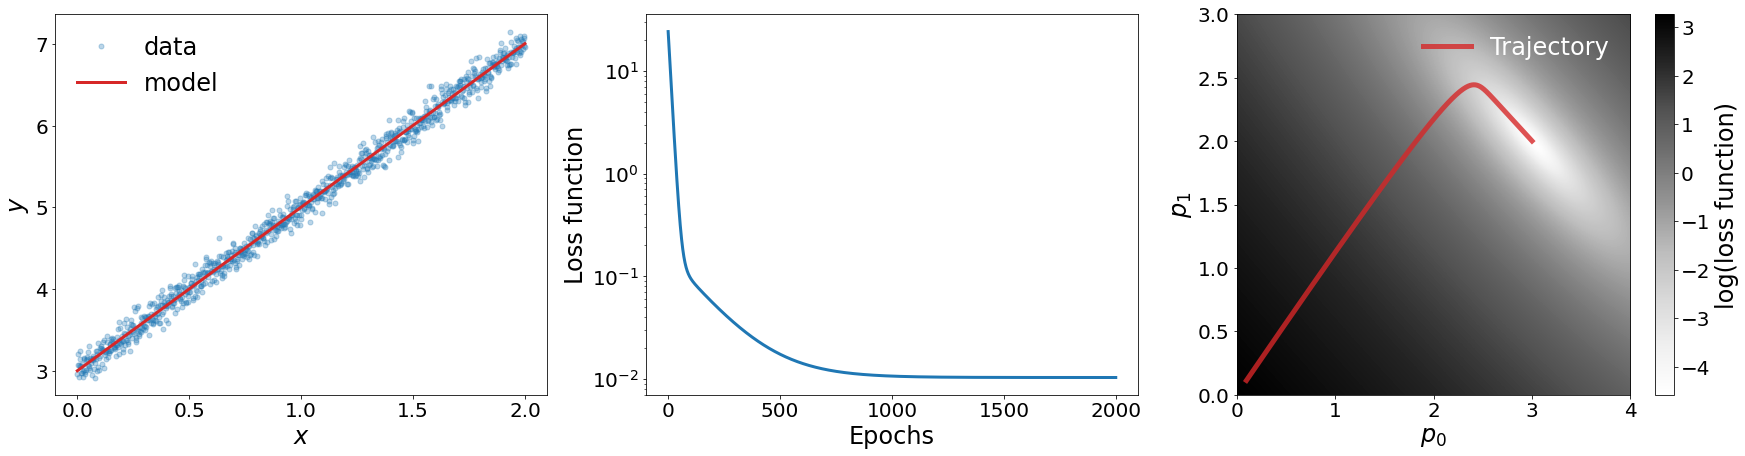

In [55]:
parameters = python_linear_descent(x, y, mu=0.01, N_epochs=2000)
plot_model(parameters)

### NumPy implementation

The NumPy implementation makes full use of the vectorization feature discussed several times in this chapter, as well as broadcasting. This leads to significantly clearer code and also much faster execution. We can note, in particular, the different syntax used to update the model parameters.

In [56]:
def numpy_linear_descent(x, y, mu, N_epochs):

    # To define the lost function
    n = x.shape[0]
    
    # Initialize predictions, errors, parameters and gradients.
    ym = np.zeros(n)
    para = np.zeros((N_epochs, 2))
    pm, grad = np.zeros(2), np.zeros(2)
    
    # Looping over iterations (epochs)
    for i_epoch in range(0, N_epochs):
        delta = y-ym
        grad = -2/n * np.array([np.sum(delta), np.sum(delta*x)])
        pm = pm - mu*grad
        ym = model(x, pm[0], pm[1])
        
        # Save all parameters
        para[i_epoch] = pm
    
    return para

%timeit numpy_linear_descent(x, y, mu=0.01, N_epochs=2000)

40.3 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


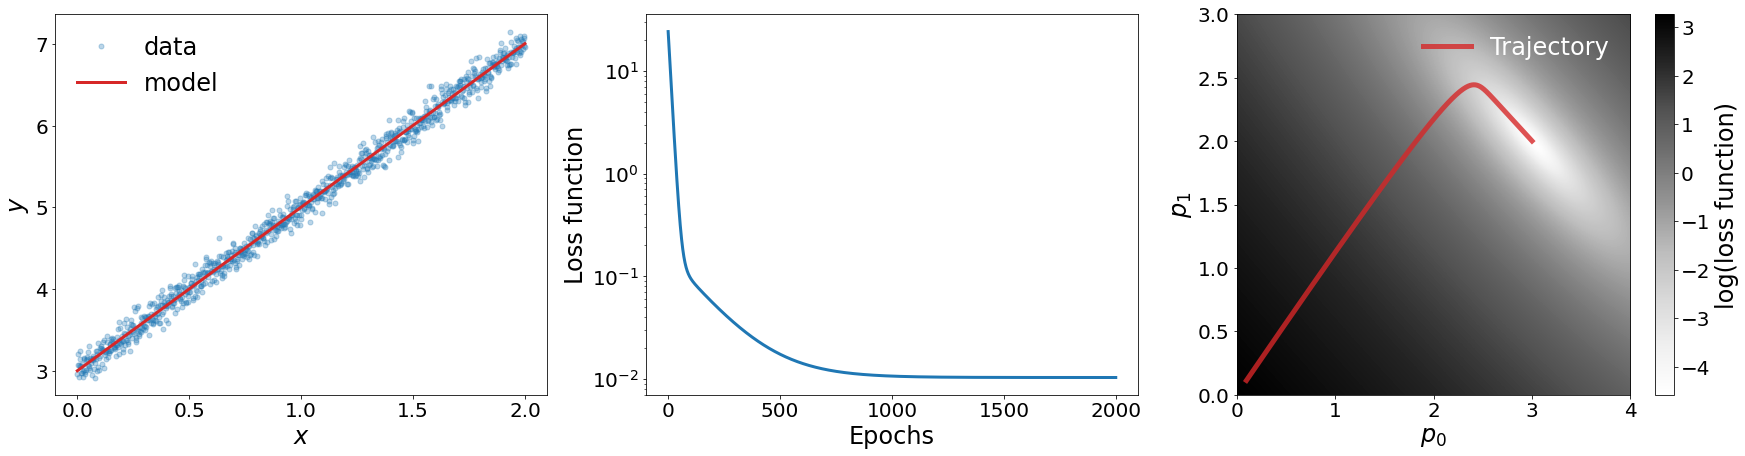

In [57]:
parameters = numpy_linear_descent(x, y, mu=0.01, N_epochs=2000)
plot_model(parameters)

We check that the results are indeed the same for an execution about 25 times faster...

## Example of a vectorized grid scan with NumPy

### Context: The brute force grid scan

This approach consists of scanning the parameter space to find the optimum of a given (loss) function. This procedure is not often the best one for a real-life case, but it is interesting to know how to efficiently code this scan using the vectorization and broadcasting of NumPy, as this logic can be useful in other contexts. For this example, we will define (fake) data on which we will fit several models having a different number of parameters. The fit will be performed with a parameter grid scan search, both with pure Python and NumPy. Note that the plotting package presented in the next chapter will be used for this example.

In [58]:
import matplotlib.pyplot as plt

In [59]:
# Fake data with noise
Npoints, Nsampling = 20, 1000
xcont = np.linspace(-5.0, 3.5, Nsampling)
x = np.linspace(-5, 3.0, Npoints)
y = 2*(np.sin(x/2)**2 + np.random.random(Npoints)*0.3)
dy = np.sqrt(0.10**2 + (0.10*y)**2)

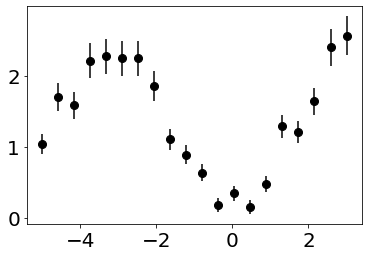

In [60]:
# Data style for plotting
data_style = {'marker': 'o', 'color': 'black', 'markersize': 8,
             'linestyle': '', 'zorder': 10, 'label': 'Data'}

# Plotting the fake data
plt.errorbar(x, y, yerr=dy, **data_style);

In [61]:
# Linear model
def model_lin(x, p0, p1):
    return p0 + p1*x

# Trigonometric model
def model_x3(x, p0, p1, p2, p3):
    return p0 + p1*x + p2*x**2 + p3*x**3 

### Pure Python approach: nested loops

The naive way to proceed with a grid scan is to perform nested loops (as many as parameters to scan) and compute the loss function for each point in the grid. We will keep track of the minimum loss and the corresponding parameters. We will try this approach on the linear model only.

In [62]:
# Loss for linear model for nested loops
def loss_linear_loops(p0, p1):
    residus = (y - model_lin(x, p0, p1)) / dy 
    return np.sum( residus**2 )

In [63]:
def grid_scan_linear_loops(N0=100, N1=100):
    
    '''
    Perform a grid search over (p0, p1) using nested loops 
    for the linear model. Return the parameter for which 
    the loss was found to be minimal in the grid.
    '''
    
    # Defining the grid
    p0s = np.linspace(-2, 2, N0)
    p1s = np.linspace(-3, 3, N1)

    # Loop over parameters
    lmin, ip0min, ip1min = 1e10, -1, -1
    for ip0, p0 in enumerate(p0s):
        for ip1, p1 in enumerate(p1s):
            l = loss_linear_loops(p0, p1)
            if l<lmin:
                lmin = l
                ip0min = ip0
                ip1min = ip1
    
    # Return the minimum of the loss and the associated parameters
    return p0s[ip0min], p1s[ip1min]

p0=0.87, p1=-0.09


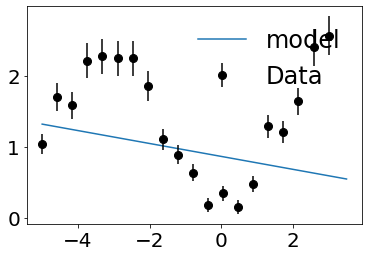

In [64]:
# Making the scan
p0, p1 = grid_scan_linear_loops()
print(f'p0={p0:.2f}, p1={p1:.2f}')

# Plotting the result
plt.plot(xcont, model_lin(xcont, p0, p1), label='model')
plt.errorbar(x, y, yerr=dy, **data_style);
plt.legend();

### NumPy approach: broadcasting + vectorization

The idea is to enlarge the dimension of the initial array in such a way that broadcasting is made possible and give the proper result. Let's assume we have 2 parameters with `N0` and `N1` values each, the final result should be a 2D array of shape `(N0, N1)` which will be the values of the loss function for every parameter values. The residuals are computed at first for every individual data points `residuals`, before being summed up over the dataset. The strategy is to have `nPars+1` axis. For example, with the 2 parameters, we would change the dimension with empty axis as below: 
```
data (Ndata) --> ( 1,  1, Ndata)
par0 (N0)    --> (N0,  1,     1)
par1 (N1)    --> ( 1, N1,     1)
residuals    --> (N0, N1, Ndata)
```
The sum over the dataset is then performed over the last axis which result into the wanted 2D array. This is coded below and a generalization to an arbitrary number of parameter is also presented.

In [65]:
def loss_linear_vectorized(p0s, p1s):
    
    '''
    Loss function generalized for arrays of parameters.
    Return a 2D array (Np0, Np1) being the value of the
    loss function for all parameters values.
    '''
    
    # Preparing shape of data for broadcasting
    xb  = x[np.newaxis, np.newaxis, :]
    yb  = y[np.newaxis, np.newaxis, :]
    dyb = dy[np.newaxis, np.newaxis, :]

    # Preparing shape of parameters for broadcasting
    p0sb = p0s[:, np.newaxis, np.newaxis]
    p1sb = p1s[np.newaxis, :, np.newaxis]
    
    # Compute the residus for each points and paramter values
    residus = (yb - model_lin(xb, p0sb, p1sb)) / dyb 

    # Return the sum over all points for each parameters values
    return np.sum(residus**2, axis=-1)

In [66]:
def grid_scan_linear_vectorized(N0=100, N1=100):
    
    '''
    Perform a grid search over (p0, p1) using vectorization 
    for the linear model. Return the parameter for which 
    the loss was found to be minimal in the grid. If several
    is found, the first one found by np.where() is returned.
    '''
    
    # Defining the grid
    p0s = np.linspace(-2, 2, N0)
    p1s = np.linspace(-3, 3, N1)

    # Compute losses for all parameters
    ls = loss_linear_vectorized(p0s, p1s)
    
    # Get the optmized parameters
    lmin = np.min(ls)
    ip0min, ip1min = np.where(lmin==ls)
    
    # Return the minimum of the loss and the associated parameters
    return p0s[ip0min[0]], p1s[ip1min[0]]

p0=0.87, p1=-0.09


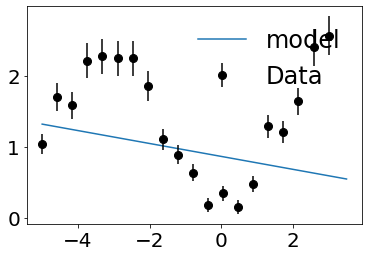

In [67]:
# Making the scan
p0, p1 = grid_scan_linear_vectorized()
print(f'p0={p0:.2f}, p1={p1:.2f}')

# Plotting the result
plt.plot(xcont, model_lin(xcont, p0, p1), label='model')
plt.errorbar(x, y, yerr=dy, **data_style);
plt.legend();

Let's try to generalize to an arbitrary model, dataset, and parameter grid. For this, the new dimension will be created on the fly, and the function `np.reshape()` will be used since it accepts a Python list to specify the dimension along each axis. As you can see below, such a function can be written, but the limiting factor will then be the available memory. This brute force approach scales very badly with the dimension of the problem (i.e. the number of parameters).

In [68]:
def loss_vectorized(xdata, ydata, dydata, model, *modelpars):
    
    '''
    Return the loss value for the full data set
    for a model `model` and the associated parameters.
       
       loss = sum_{data} ( ydata - model(xdata, *pars) )^2
       
    For example, if we have 20 data points with a model of 3 parameters
    having 200 steps each, the internally created arrays have the following 
    dimensions:
        data = (  1, 1, 1, 20)
        par1 = (200, 1, 1,  1)
        par2 = (1, 200, 1,  1)
        par3 = (1, 1, 200,  1)
       
    Arguments:
    ----------
         
      - xdata, ydata, dydata: 1D array corresponding to the data points.
      - model: callable of type f(x, *pars).
      - *modelpars: list of 1D array correponding to the scan of each 
                    parameter.
    '''
    
    # Parameters
    pars = [p for p in modelpars]
    Npars = len(pars)
    
    # Generic data broadcasting for Npars:
    # Data shape : (1, 1, 1, ..., 1, Ndata) (with as much as 1 as Npars)
    data_dim = [1 for p in pars]
    data_dim.append(xdata.shape[0]) # Append the last axis with Ndata
    xdata_b  = xdata.reshape(data_dim)
    ydata_b  = ydata.reshape(data_dim)
    dydata_b = dydata.reshape(data_dim)
    
    # Generic broadcasting for each parameters
    pars_b = []
    for ip in range(Npars):
        pdim = [1 if ip!=jp else pars[ip].shape[0] for jp in range(Npars)]
        pdim.append(1) # Append a last empty axis for the data
        pars_b.append(pars[ip].reshape(pdim))

    # Compute residus
    residus = (ydata_b - model(xdata_b, *pars_b)) / dydata_b
    
    # Return the sum over data - first axis
    return np.sum(residus**2, axis=-1)

In [69]:
# Trying the function
all_pars = [np.linspace(0, 1, 10) for i in range(4)]
ls = loss_vectorized(x, y, dy, model_x3, *all_pars)
print(ls.shape, ls.size)

(10, 10, 10, 10) 10000


In [70]:
def grid_scan_vectorized(xdata, ydata, dydata, model, mins, maxs, steps):
    
    '''
    Return the parameter which minimize the loss function over the full 
    dataset for a model `model` :
       
       loss = sum_{data} ( ydata - model(xdata, *pars) )^2
       
    Arguments:
    ----------
      - xdata, ydata, dydata: 1D array corresponding to the data points.
      - model: callable of type model(x, *pars).
      - mins : list of floats being the minimum for each paramters
      - maxs : list of floats being the maximum for each paramters
      - steps: list of integers being the steps for each parameters
    '''
    
    # Checking that the inputs for the parameters are correct
    nmins, nmaxs, nsteps = len(mins), len(maxs), len(steps)
    if not (nmins==nmaxs and nmins==nsteps and nmaxs==nsteps):
        print(f'Uncorrect numbers for min, max and/or steps: {len(mins)}, {len(maxs)}, {len(steps)}')
        return [-1]
            
    # Defining the parameter grid
    npars = nmins
    pars  = [np.linspace(mins[i], maxs[i], steps[i]) for i in range(npars)]
    
    # Computing the loss for all parameters
    ls = loss_vectorized(xdata, ydata, dydata, model, *pars)
    
    # Get the optmized parameters
    lmin = np.min(ls)
    ipars_min = np.where(lmin==ls)
    
    # Return the minimum of the loss and the associated parameters
    return [ p[i[0]] for p, i in zip(pars, ipars_min) ]

p0=0.87, p1=-0.09


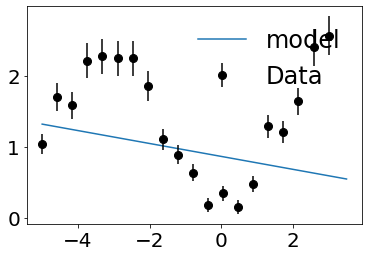

In [71]:
# Making the scan
p0, p1 = grid_scan_vectorized(x, y, dy, model_lin, [-2, -3], [2, 3], [100, 100])
print(f'p0={p0:.2f}, p1={p1:.2f}')

# Plotting the result
plt.plot(xcont, model_lin(xcont, p0, p1), label='model')
plt.errorbar(x, y, yerr=dy, **data_style);
plt.legend();

p0=0.35, p1=-0.22, p2=0.27, p3=0.055


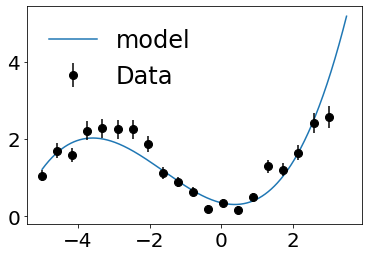

In [72]:
# Making the scan with same function for another model.
p0, p1, p2, p3 = grid_scan_vectorized(x, y, dy, model_x3, [-1, -1, -1, -0.1], [1, 1, 1, 0.1], [50]*4)
print(f'p0={p0:.2f}, p1={p1:.2f}, p2={p2:.2f}, p3={p3:.3f}')

# Plotting the result
plt.plot(xcont, model_x3(xcont, p0, p1, p2, p3), label='model')
plt.errorbar(x, y, yerr=dy, **data_style);
plt.legend();

### Timing comparison for 2 parameters

In [73]:
%timeit grid_scan_linear_loops(N0=500, N1=500)

2.31 s ± 5.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
%timeit grid_scan_linear_vectorized(N0=500, N1=500)

45.2 ms ± 912 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
